In [1]:
# Built-in library
import json
import logging
import re
import warnings
from pathlib import Path
from pprint import pprint
from typing import Any, Literal, Optional, Union

# Standard imports
import numpy as np
import numpy.typing as npt
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "white": "#FFFFFF",  # Bright white
        "info": "#00FF00",  # Bright green
        "warning": "#FFD700",  # Bright gold
        "error": "#FF1493",  # Deep pink
        "success": "#00FFFF",  # Cyan
        "highlight": "#FF4500",  # Orange-red
    }
)
console = Console(theme=custom_theme)

# Visualization
# import matplotlib.pyplot as pltife

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)

warnings.filterwarnings("ignore")

# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
def go_up_from_current_directory(*, go_up: int = 1) -> None:
    """This is used to up a number of directories.

    Params:
    -------
    go_up: int, default=1
        This indicates the number of times to go back up from the current directory.

    Returns:
    --------
    None
    """
    import os
    import sys

    CONST: str = "../"
    NUM: str = CONST * go_up

    # Goto the previous directory
    prev_directory = os.path.join(os.path.dirname(__name__), NUM)
    # Get the 'absolute path' of the previous directory
    abs_path_prev_directory = os.path.abspath(prev_directory)

    # Add the path to the System paths
    sys.path.insert(0, abs_path_prev_directory)
    print(abs_path_prev_directory)

In [3]:
go_up_from_current_directory(go_up=2)


from schemas import ModelEnum, GeneralResponse  # noqa: E402, I001
from settings import refresh_settings  # noqa: E402

from utilities.client_utils import get_aclient  # noqa: E402

settings = refresh_settings()

/Users/neidu/Desktop/Projects/Personal/My_Projects/AI-Tutorials


In [4]:
lite_llm_aclient = get_aclient(return_type="litellm")

# Using MISTRAL API
model: str = ModelEnum.BASE_REMOTE_MODEL_8B_MISTRAL_API.value


response = await lite_llm_aclient(
    model=model,
    response_format=GeneralResponse,
    messages=[{"role": "user", "content": "What is the capital of France?"}],
    temperature=0.1,
    seed=0,
    max_tokens=200,
)
console.log(response)

Using litellm


[18:45:34] ModelResponse(                                                                          ]8;id=359266;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1422284114.py\1422284114.py]8;;\:]8;id=256308;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1422284114.py#15\15]8;;\
               id='ea61a3efad7f43a38b253176fb1a5c8e',                                                              
               created=1747503933,                                                                                 
               model='mistral/ministral-8b-latest',                                                                
               object='chat.completion',                                                                           
               system_fingerprint=None,                                                                            
               choices=[                                                                                           
                   Choices(                                                                                        
                       finish_reason='stop',                                                                       
                       index=0,                                                                                    
                       message=Message(                                                                            
                           content='{"content": "The capital of France is Paris."}',                               
                           role='assistant',                                                                       
                           tool_calls=None,                                                                        
                           function_call=None,                                                                     
                           provider_specific_fields={'refusal': None}                                              
                       )                                                                                           
                   )                                                                                               
               ],                                                                                                  
               usage=Usage(                                                                                        
                   completion_tokens=13,                                                                           
                   prompt_tokens=8,                                                                                
                   total_tokens=21,                                                                                
                   completion_tokens_details=None,                                                                 
                   prompt_tokens_details=None                                                                      
               ),                                                                                                  
               service_tier=None                                                                                   
           )                                                                                                       

In [5]:
console.log(GeneralResponse.model_validate_json(response.choices[0].message.content))

[18:45:41] GeneralResponse(content='The capital of France is Paris.')                               ]8;id=657090;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1400563594.py\1400563594.py]8;;\:]8;id=688083;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1400563594.py#1\1]8;;\

### Check if the model support structured output

- Even though `response_format`  is supported, it doesn't always guarantee the model will return the structured output especially for smaller or older models.
- To increases the likelihood of getting the structured output, we can use `Instructor`
- Without `instructor`, the `Mistral` model failed to always return the structured output.

In [6]:
from litellm import get_supported_openai_params

params = get_supported_openai_params(model=model)
pprint(params)

assert "response_format" in params

['stream',
 'temperature',
 'top_p',
 'max_tokens',
 'max_completion_tokens',
 'tools',
 'tool_choice',
 'seed',
 'stop',
 'response_format']


In [7]:
structured_aclient = get_aclient(return_type="instructor")

# Using MISTRAL API
model: str = ModelEnum.BASE_REMOTE_MODEL_8B_MISTRAL_API.value


response = await structured_aclient.chat.completions.create(
    model=model,
    response_model=GeneralResponse,
    messages=[{"role": "user", "content": "What is the capital of France?"}],
    temperature=0.1,
    seed=0,
    max_tokens=200,
)
console.log(response)

Using instructor


[18:45:49] GeneralResponse(content='The capital of France is Paris.')                              ]8;id=443544;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/2300216207.py\2300216207.py]8;;\:]8;id=700105;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/2300216207.py#15\15]8;;\

In [8]:
from typing import TypedDict

from langchain_openai import ChatOpenAI, OpenAI
from langgraph.graph import END, START, StateGraph

## 1.) State

- This is the central concept in Langgraph. It represents all the information that flows thru the application.

In [9]:
from enum import Enum

from pydantic import BaseModel, Field


class Categories(str, Enum):
    INQUIRY = "inquiry"
    COMPLAINT = "complaint"
    THANK_YOU = "thank you"
    REQUEST = "request"
    INFORMATION = "information"
    OTHER = "other"


### Define State
class EmailState(TypedDict):
    email: dict[str, Any]  # contains subject, sender, body, etc.

    # analysis and decision
    is_spam: bool | None

    # confidence in marking as spam
    spam_confidence: float | None

    # reason for the marking as spam
    spam_reason: str | None

    # category of the email (inquiry, complaint, etc.)
    email_category: str | None

    # response generation
    email_draft: str | None

    # processing metadata
    message: list[dict[str, Any]]  # for tracking conversation with LLM


class EmailStateResponse(BaseModel):
    email: dict[str, Any] = Field(default_factory=dict, description="The email body.")
    is_spam: bool | None = Field(
        default=None, description="Whether the email is spam or not."
    )
    spam_confidence: float | None = Field(
        default=None,
        ge=0,
        le=1,
        description="The confidence in marking the email as spam.",
    )
    spam_reason: str | None = Field(
        default=None, description="The reason for marking the email as spam."
    )
    email_category: Categories | None = Field(
        default=None, description="The category of the email."
    )
    email_draft: str | None = Field(
        default=None, description="The draft response to the email."
    )
    message: list[dict[str, Any]] = Field(
        default_factory=list, description="The history of the conversation."
    )

In [10]:
import asyncio
from enum import Enum
from typing import Iterable

import instructor
import nest_asyncio
import ollama
from groq import AsyncGroq, Groq
from openai import AsyncOpenAI, OpenAI

In [17]:
nest_asyncio.apply()

SYSTEM_PROMPT: dict[str, str] = {
    "role": "assistant",
    "content": "<inst>no_thinkYou're a AI assistant, Alfred the butler!</inst>",
}


async def chat_completion(
    message: dict[str, Any],
    client: Any = structured_aclient,
    model: str = model,
    response_model: GeneralResponse | EmailStateResponse = GeneralResponse,
) -> GeneralResponse | EmailStateResponse:
    """Returns a response from the LLM given a message."""
    assert isinstance(message, dict), "message must be a dictionary"
    print(f"Using model: {model!r}")

    messages = [SYSTEM_PROMPT, message]

    if isinstance(client, instructor.AsyncInstructor):
        response: Any = await client.chat.completions.create(
            response_model=response_model,
            model=model,
            messages=messages,
            max_retries=5,
            temperature=0.0,
            seed=2,
        )
        return response

    response: Any = await client(
        response_format=response_model,
        model=model,
        messages=messages,
        max_retries=3,
        temperature=0,
        seed=2,
    )

    formatted_response: str = response_model.model_validate_json(
        response.choices[0].message.content
    )

    return formatted_response


message: dict[str, Any] = {
    "role": "user",
    "content": "<user>Tell me a short funny joke about Prison Break TV series.</user>",
}

result = asyncio.run(chat_completion(message=message))
console.log(result)

Using model: 'mistral/ministral-8b-latest'


[18:47:28] GeneralResponse(                                                                        ]8;id=46907;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/2779246185.py\2779246185.py]8;;\:]8;id=276291;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/2779246185.py#54\54]8;;\
               content="Why don't prisoners play cards in the shower? Because they're afraid of                    
           getting caught in the flush!"                                                                           
           )                                                                                                       

### 2.) Nodes

- These are Python functions that represent the main logic of the application. 
- Each node: 
  - takes the state as input.
  - performs some operation.
  - returns pdates to the state.

In [12]:
nest_asyncio.apply()


async def read_email(state: EmailState) -> dict[str, Any]:
    """Alfred reads and logs the incoming email."""
    email: dict[str, Any] = state["email"]

    # Some preprocessing steps
    print(
        f"Alfred is processing an email from {email['sender']!r} with "
        f"subject {email['subject']!r}.\n\n"
    )

    # No state changes neede here
    return {}


async def classify_email(state: EmailState) -> dict[str, Any]:
    """Alfred uses an LLM to classify the email as spam or not."""
    email: dict[str, Any] = state["email"]

    # Prepare the prompt
    prompt: str = f"""
    <prompt>
        As Alfred the butler, analyze this email and determine if it's spam
        <is_spam> **True** or **False** </is_spam> or not.

        <email>
            From: {email["sender"]}
            Subject: {email["subject"]}
            Body: {email["body"]}
        </email>

        <inst>
            1. Determine the spam confidence. If it's greater than 0.5, classify it as spam.
            2. If it's spam, explain why.
            3. If it's ham, categorize it as one of these: <categories> {list(Categories)} </categories>.
        </inst>
    </prompt>
    """

    # Call the LLM
    response: EmailStateResponse = await chat_completion(
        message={"role": "user", "content": prompt}, response_model=EmailStateResponse
    )
    # print(f"Response: {response}")  # for debugging

    response_text: dict[str, Any] = response.model_dump()

    # Update messages for tracking
    new_messages: list[dict[str, str]] = state.get("messages", []) + [
        {"role": "user", "content": prompt},
        {"role": "assistant", "content": response},
    ]

    # Return state updates
    return {
        "is_spam": response_text["is_spam"],
        "spam_confidence": response_text["spam_confidence"],
        "spam_reason": response_text["spam_reason"],
        "email_category": response_text["email_category"],
        "messages": new_messages,
    }


async def handle_spam(state: EmailState) -> dict[str, Any]:
    """Alfred discards spam emails."""
    print(
        f"Alfred has marked the email as spam. \nReason: {state['spam_reason']}. \n"
        "The email has been moved to the spam folder."
    )

    # No state changes needed here
    return {}


async def draft_response(state: EmailState) -> dict[str, Any]:
    """Alfred drafts a response to the email."""
    # print(f"{state = }")
    email: dict[str, Any] = state["email"]

    # Prepare the prompt
    prompt: str = f"""
    <prompt>
        <inst>
            As Alfred the butler, draft a response to this email below:
        </inst>

        <email>
            From: {email["sender"]}
            Subject: {email["subject"]}
            Body: {email["body"]}
        </email>

        This email has been categorized as **{state["email_category"]}**.

        <inst>
            Draft a brief response that Mr. Neidu can review and personalize before sending.
        </inst>

    </prompt>
    """

    # Call the LLM
    response: GeneralResponse = await chat_completion(
        message={"role": "user", "content": prompt}, response_model=GeneralResponse
    )

    # Update messages for tracking
    new_message: list[dict[str, Any]] = state.get("messages", []) + [
        {"role": "user", "content": prompt},
        {"role": "assistant", "content": response.model_dump()},
    ]

    # Return state updates
    return {
        "email_draft": response.model_dump(),
        "messages": new_message,
    }


async def notify_user(state: EmailState) -> dict[str, Any]:
    """Alfred sends a notification to the user."""
    # print(f"{state = }")  # for debugging

    email: dict[str, Any] = state["email"]

    # Prints a separator line of 50 equal signs to visually distinguish sections of output
    print("\n" + "=" * 80)
    print(f"Sir, you've received an email from {email['sender']}.")
    print(f"Subject: {email['subject']}")
    print(f"Category: {state['email_category']}")
    print("\nI've drafted a response for your review.")
    print("-" * 80)
    print(state["email_draft"])
    print("=" * 80 + "\n")

    return {}

### 3.) Define Routing Logic

In [13]:
def route_email(stete: EmailState) -> str:
    """Determine the next step to take."""
    if stete["is_spam"]:
        return "spam"

    return "ham"

### 4.) Create StateGraph and Define Edges

- Edges: These are connections between nodes. They represent the possible paths thru the graph.

- StateGraph: This is a container that holds the entire agent workflow.

In [14]:
# Create the graph
email_graph = StateGraph(EmailState)

# Add nodes
email_graph.add_node("read_email", read_email)
email_graph.add_node("classify_email", classify_email)
email_graph.add_node("handle_spam", handle_spam)
email_graph.add_node("draft_response", draft_response)
email_graph.add_node("notify_user", notify_user)

# Start the edges
email_graph.add_edge(START, "read_email")
email_graph.add_edge("read_email", "classify_email")

# Add conditional branches
email_graph.add_conditional_edges(
    "classify_email", route_email, {"spam": "handle_spam", "ham": "draft_response"}
)

# Add the fnal edges
email_graph.add_edge("handle_spam", END)
email_graph.add_edge("draft_response", "notify_user")
email_graph.add_edge("notify_user", END)

# Compile the graph
compiled_graph = email_graph.compile()

### Run The Application

In [19]:
# Example ham email
ham_email: dict[str, Any] = {
    "sender": "john.smith@example.com",
    "subject": "Meeting Request",
    "body": "Dear Mr. Neidu, I hope this email meets you well. We have a demo next week, "
    "and would like to inform you about the services we offer. Can we schedule a "
    "meeting to discuss the details? Thank you for your time."
    "Best regards, John Smith",
}

ham_email_2: dict[str, Any] = {
    "sender": "john.smith@example.com",
    "subject": "Following Up: Quick Idea on Improving Workflow Efficiency",
    "body": "Dear Mr. Neidu, My name is John Smith, and I'm with Innovate Solutions Inc. "
    "I'm reaching out because I believe our solution could offer significant value in "
    "streamlining your operational workflows. We are conducting brief demos next week, "
    "and I would welcome the opportunity to show you how our workflow automation platform works "
    "and discuss how it might specifically benefit your operations team."
    "Would you be available for a quick, no-obligation introductory call sometime "
    "next week to explore this further? Please let me know what time works best for you."
    "Thank you for your time and consideration. \n"
    "Yours sincerely, John Smith",
}

# Example spam email
spam_email: dict[str, Any] = {
    "sender": "winner@lottery-intl.com",
    "subject": "YOU HAVE WON $5,000,000!!!",
    "body": "CONGRATULATIONS! You have been selected as the winner of our international "
    "lottery! To claim your $5,000,000 prize, please send us your bank details and a "
    "processing fee of $100.",
}

# Process the ham email
print("\nProcessing ham email...")
try:
    ham_result = await compiled_graph.ainvoke(
        {
            "email": ham_email_2,
            "is_spam": None,
            "spam_reason": None,
            "email_category": None,
            "email_draft": None,
            "messages": [],
        }
    )
except Exception as e:
    print(f"Error: {e}\n{type(e)}")


Processing ham email...
Alfred is processing an email from 'john.smith@example.com' with subject 'Following Up: Quick Idea on Improving Workflow Efficiency'.


Using model: 'mistral/ministral-8b-latest'
Using model: 'mistral/ministral-8b-latest'

Sir, you've received an email from john.smith@example.com.
Subject: Following Up: Quick Idea on Improving Workflow Efficiency
Category: Categories.REQUEST

I've drafted a response for your review.
--------------------------------------------------------------------------------
{'content': 'Dear John, Thank you for reaching out and for your interest in our workflow automation platform. I appreciate the opportunity to explore how it might benefit our operations team. I am available for a call next week. Please let me know a suitable time for you. Best regards, Mr. Neidu'}



In [21]:
console.log(ham_result)
# console.log(ham_result["email_draft"]["content"])

[18:49:03] {                                                                                        ]8;id=901086;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/3114795956.py\3114795956.py]8;;\:]8;id=683580;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/3114795956.py#1\1]8;;\
               'email': {                                                                                          
                   'sender': 'john.smith@example.com',                                                             
                   'subject': 'Following Up: Quick Idea on Improving Workflow Efficiency',                         
                   'body': "Dear Mr. Neidu, My name is John Smith, and I'm with Innovate Solutions                 
           Inc. I'm reaching out because I believe our solution could offer significant value in                   
           streamlining your operational workflows. We are conducting brief demos next week, and I                 
           would welcome the opportunity to show you how our workflow automation platform works and                
           discuss how it might specifically benefit your operations team.Would you be available                   
           for a quick, no-obligation introductory call sometime next week to explore this further?                
           Please let me know what time works best for you.Thank you for your time and                             
           consideration. \nYours sincerely, John Smith"                                                           
               },                                                                                                  
               'is_spam': False,                                                                                   
               'spam_confidence': 0.2,                                                                             
               'spam_reason': None,                                                                                
               'email_category': <Categories.REQUEST: 'request'>,                                                  
               'email_draft': {                                                                                    
                   'content': 'Dear John, Thank you for reaching out and for your interest in our                  
           workflow automation platform. I appreciate the opportunity to explore how it might                      
           benefit our operations team. I am available for a call next week. Please let me know a                  
           suitable time for you. Best regards, Mr. Neidu'                                                         
               }                                                                                                   
           }                                                                                                       

In [22]:
# Process the spam email
print("\nProcessing spam email...")
try:
    spam_result = await compiled_graph.ainvoke(
        {
            "email": spam_email,
            "is_spam": None,
            "spam_confidence": None,
            "spam_reason": None,
            "email_category": None,
            "email_draft": None,
            "messages": [],
        }
    )
except Exception as e:
    print(f"Error: {e}")


Processing spam email...
Alfred is processing an email from 'winner@lottery-intl.com' with subject 'YOU HAVE WON $5,000,000!!!'.


Using model: 'mistral/ministral-8b-latest'
Alfred has marked the email as spam. 
Reason: The email contains a prize notification with a request for personal and financial information, which is a common tactic used in phishing scams.. 
The email has been moved to the spam folder.


In [23]:
console.log(spam_result, style="warning")

[18:49:21] {                                                                                        ]8;id=346160;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/4245628018.py\4245628018.py]8;;\:]8;id=706274;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/4245628018.py#1\1]8;;\
               'email': {                                                                                          
                   'sender': 'winner@lottery-intl.com',                                                            
                   'subject': 'YOU HAVE WON $5,000,000!!!',                                                        
                   'body': 'CONGRATULATIONS! You have been selected as the winner of our                           
           international lottery! To claim your $5,000,000 prize, please send us your bank details                 
           and a processing fee of $100.'                                                                          
               },                                                                                                  
               'is_spam': True,                                                                                    
               'spam_confidence': 1.0,                                                                             
               'spam_reason': 'The email contains a prize notification with a request for personal                 
           and financial information, which is a common tactic used in phishing scams.',                           
               'email_category': <Categories.OTHER: 'other'>,                                                      
               'email_draft': None                                                                                 
           }                                                                                                       

## Visualize Graph

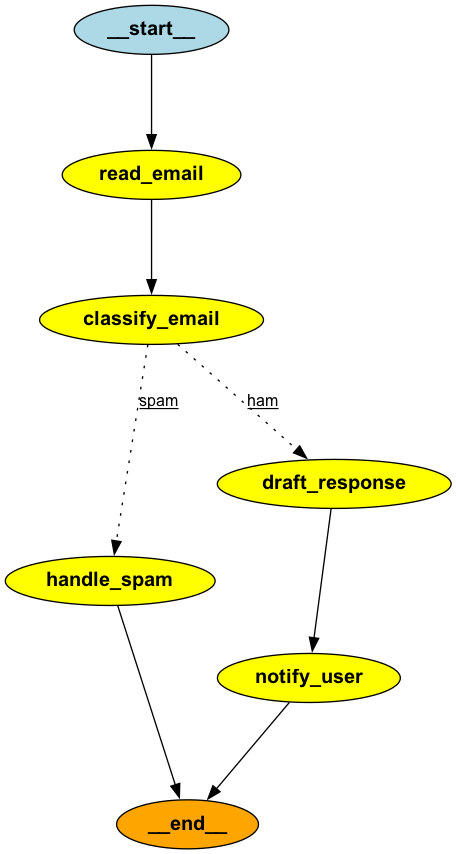

In [24]:
# uv add pygraphviz or pip install pygraphviz
from IPython.display import Image

Image(compiled_graph.get_graph().draw_png())

## Observability

- Using [LangFuse](https://github.com/langfuse/langfuse)

In [25]:
from langfuse.callback import CallbackHandler

langfuse_handler = CallbackHandler()


# Process a legitimate email
ham_email_result = await compiled_graph.ainvoke(
    input={
        "email": ham_email_2,
        "is_spam": None,
        "spam_confidence": None,
        "spam_reason": None,
        "email_category": None,
        "email_draft": None,
        "messages": [],
    },
    config={"callbacks": [langfuse_handler]},
)

Alfred is processing an email from 'john.smith@example.com' with subject 'Following Up: Quick Idea on Improving Workflow Efficiency'.


Using model: 'mistral/ministral-8b-latest'
Using model: 'mistral/ministral-8b-latest'

Sir, you've received an email from john.smith@example.com.
Subject: Following Up: Quick Idea on Improving Workflow Efficiency
Category: Categories.REQUEST

I've drafted a response for your review.
--------------------------------------------------------------------------------
{'content': 'Dear John, Thank you for reaching out and for your interest in our workflow automation platform. I appreciate the opportunity to explore how it might benefit our operations team. I am available for a call next week. Please let me know a suitable time for you. Best regards, Mr. Neidu'}



In [26]:
console.log(ham_email_result)

[18:59:35] {                                                                                        ]8;id=122722;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1006431097.py\1006431097.py]8;;\:]8;id=367366;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_50315/1006431097.py#1\1]8;;\
               'email': {                                                                                          
                   'sender': 'john.smith@example.com',                                                             
                   'subject': 'Following Up: Quick Idea on Improving Workflow Efficiency',                         
                   'body': "Dear Mr. Neidu, My name is John Smith, and I'm with Innovate Solutions                 
           Inc. I'm reaching out because I believe our solution could offer significant value in                   
           streamlining your operational workflows. We are conducting brief demos next week, and I                 
           would welcome the opportunity to show you how our workflow automation platform works and                
           discuss how it might specifically benefit your operations team.Would you be available                   
           for a quick, no-obligation introductory call sometime next week to explore this further?                
           Please let me know what time works best for you.Thank you for your time and                             
           consideration. \nYours sincerely, John Smith"                                                           
               },                                                                                                  
               'is_spam': False,                                                                                   
               'spam_confidence': 0.2,                                                                             
               'spam_reason': None,                                                                                
               'email_category': <Categories.REQUEST: 'request'>,                                                  
               'email_draft': {                                                                                    
                   'content': 'Dear John, Thank you for reaching out and for your interest in our                  
           workflow automation platform. I appreciate the opportunity to explore how it might                      
           benefit our operations team. I am available for a call next week. Please let me know a                  
           suitable time for you. Best regards, Mr. Neidu'                                                         
               }                                                                                                   
           }                                                                                                       